In [1]:
digits = 2412;
n = 48;
[X, Y, yc] = naca4digit(digits, n, true);

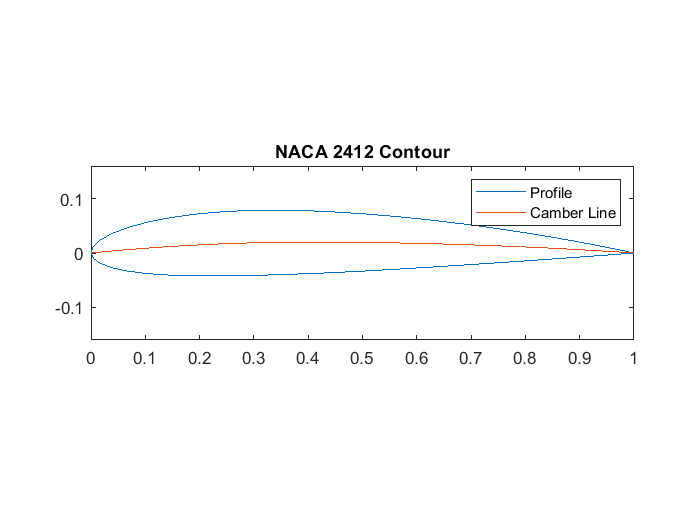

In [2]:
close all
plot(X, Y)
hold on
domain = linspace(0, 1);
plot(domain, yc(domain));
legend("Profile", "Camber Line")
title(sprintf("NACA %d Contour", digits))
axis equal
xlim([0, 1])
ylim([-.16, .16])

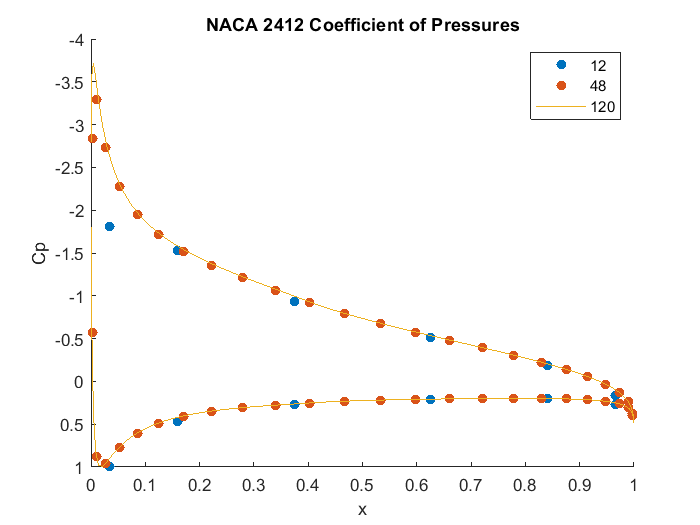

In [3]:
resolutions = [12, 48, 120];
alpha = 8*pi/180;
digits = 2412;

close all
hold on
for n = resolutions
    [X, Y] = naca4digit(digits, n, true);
    Cp = vortex_panel_method(X, Y, alpha);
    
    XC = (X(1:end-1) + X(2:end)) / 2;
    if n ~= resolutions(end)
        scatter(XC, Cp, "filled")
    end
end

plot(XC(1:n/2), Cp(1:n/2), "Color", "#EDB120")
plot(XC(n/2+1:end), Cp(n/2+1:end), "Color", "#EDB120")
hold off

xlabel("x")
ylabel("Cp")
title(sprintf("NACA %d Coefficient of Pressures", digits))
legend(arrayfun(@num2str, resolutions, 'UniformOutput', 0))
set(gca, 'ydir', 'reverse')

In [8]:
alphas = (-8:8)*pi/180;
alphaCount = length(alphas);
Cls = zeros(alphaCount, 1);
CM4s = zeros(alphaCount, 1);
Xcps = zeros(alphaCount, 1);

for j = 1:alphaCount
    [Cls(j), ~, ~, Xcps(j)] = get_coefficients(X, Y, alphas(j));
end
CM4s = -Cls .* (Xcps - .25);

In [9]:
alphas = alphas'*180/pi;
clfit = fit(alphas, Cls, "poly1")
cm4fit = fit(alphas, CM4s, "poly1")

alphaZLC = -clfit.p2 / clfit.p1;

xcpfit = fit(alphas, Xcps, sprintf("p1/(x-%f) + p2", alphaZLC))

dcmdcl = cm4fit.p1 / clfit.p1;
xac = .25 - dcmdcl;

macfit = fit(alphas, -Cls.*(Xcps - xac), "poly1")

alphaZLC, dcmdcl, xac

clfit = 
     Linear model Poly1:
     clfit(x) = p1*x + p2
     Coefficients (with 95% confidence bounds):
       p1 =      0.1194  (0.1193, 0.1195)
       p2 =      0.2581  (0.2576, 0.2587)

cm4fit = 
     Linear model Poly1:
     cm4fit(x) = p1*x + p2
     Coefficients (with 95% confidence bounds):
       p1 =   -0.001263  (-0.001311, -0.001216)
       p2 =    -0.05627  (-0.0565, -0.05604)

xcpfit = 
     General model:
     xcpfit(x) = p1/(x--2.161769) + p2
     Coefficients (with 95% confidence bounds):
       p1 =      0.4426  (0.4422, 0.443)
       p2 =      0.2609  (0.2602, 0.2616)

macfit = 
     Linear model Poly1:
     macfit(x) = p1*x + p2
     Coefficients (with 95% confidence bounds):
       p1 =    4.66e-19  (-4.713e-05, 4.713e-05)
       p2 =    -0.05354  (-0.05377, -0.05331)

alphaZLC = -2.1618

dcmdcl = -0.0106

xac = 0.2606

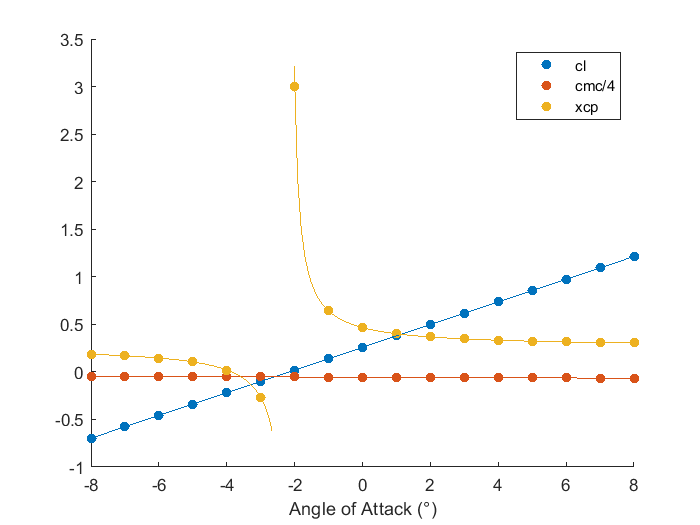

In [10]:
close all

scatter(alphas, Cls, "filled")
hold on
scatter(alphas, CM4s, "filled")
scatter(alphas, Xcps, "filled")
xlabel("Angle of Attack (°)")

domain = linspace(alphas(1), alphas(end));
plot(domain, polyval(coeffvalues(clfit), domain), "Color", "#0072BD")
plot(domain, polyval(coeffvalues(cm4fit), domain), "Color", "#D95319")

domain = linspace(alphas(1), alphaZLC-.5);
plot(domain, xcpfit.p1 ./ (domain - alphaZLC) + xcpfit.p2, "Color", "#EDB120")
domain = linspace(alphaZLC+.15, alphas(end));
plot(domain, xcpfit.p1 ./ (domain - alphaZLC) + xcpfit.p2, "Color", "#EDB120")
legend("cl", "cmc/4", "xcp")